In [102]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Funciones a usarse para plotear

In [61]:
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, "{:.2f}".format(h),
                ha='center', va='bottom')

### Generar los equipos con sus jugadas y temporadas 

In [62]:
class equipo:
    def __init__(self, name):
        self.name = name
        self.play_values=['% Time','PPP','aFG%', 'Poss / Game', 'Points']
        self.temporadas=set()
        self.play={}
    
    def jugada(self,tipo,stats):
        if tipo not in self.play:
            self.play[tipo]=[stats]
        else:
            self.play[tipo].append(stats)
            
    def current_temporada(self,tempo):
        self.temporadas.add(tempo)
        
    def list_temporadas(self,tempo):
        self.temporadas=[x for x in tempo if x in self.temporadas]

In [63]:
path1=r'../../database/lnb_ultimas_5_temporadas'
temporada=os.listdir(path1)

path2=path1 + '/' + temporada[-1]
pos=os.listdir(path2)

path3 = path2 + '/' + pos[1]
jugada=os.listdir(path3)
# jugada.remove('~�LONG RANGE.xlsx')

#path = path3 + '/' + jugada[1]

In [64]:
##no son los mismos equipos por temporada hay que generarlos de forma ineficiente lamentablemente
teams=set()
for k in temporada:
    path = path1 + '/' + k + '/' + pos[1] + '/' + jugada[1]
    df=pd.read_excel(path,header=3)
    teams.update(df['Team'].tolist())
    
equipos=[]
for i in teams:
    equipos.append(equipo(i))

In [65]:
for k in temporada:
    for i in jugada:
        path = path1 + '/' + k + '/' + pos[1] + '/' + i
        try:
            df=pd.read_excel(path,header=3)
            temp_teams=df['Team'].tolist()
    
            for j in equipos:
                if j.name in temp_teams:
                    vals=df.loc[df['Team'] == j.name][['% Time','PPP','aFG%', 'Poss / Game', 'Points']].values.tolist()[0]
                    j.jugada(i,vals)
                    j.current_temporada(k)
        except:
            print("Error en archivo " + path)

Error en archivo ../../database/lnb_ultimas_5_temporadas/15_16/ATAQUE/.~lock.LONG RANGE.xlsx#
Error en archivo ../../database/lnb_ultimas_5_temporadas/18_19/ATAQUE/.~lock.LONG RANGE.xlsx#
Error en archivo ../../database/lnb_ultimas_5_temporadas/17_18/ATAQUE/.~lock.LONG RANGE.xlsx#
Error en archivo ../../database/lnb_ultimas_5_temporadas/19_20/ATAQUE/ISOLATION.xlsx
Error en archivo ../../database/lnb_ultimas_5_temporadas/19_20/ATAQUE/ROLL.xlsx
Error en archivo ../../database/lnb_ultimas_5_temporadas/19_20/ATAQUE/.~lock.LONG RANGE.xlsx#
Error en archivo ../../database/lnb_ultimas_5_temporadas/16_17/ATAQUE/.~lock.LONG RANGE.xlsx#


In [66]:
##los set no retienen orden
for i in equipos:
    i.list_temporadas(temporada)

#### Se genera los objetos equipos que contienen 3 stats de cada tipo de jugada, por cada temporada de existencia del equipo en la liga

##### Tenemos overall para ver el desempeño de un equipo en terminos de eficiencia. half court en oposición a transition.

In [67]:
overall='OVERALL.xlsx'
tipo1=['TRANSITION.xlsx','HALF COURT.xlsx']

jug=jugada.copy()
for i in ['TRANSITION.xlsx','HALF COURT.xlsx','OVERALL.xlsx', '.~lock.LONG RANGE.xlsx#']:
    jug.remove(i)

In [68]:
tott=0
for i in jug:
    tott += equipos[0].play[i][0]
print(tott)

TypeError: unsupported operand type(s) for +=: 'int' and 'list'

In [69]:
##hay superposición entre las jugadas, habría que seguir separando para que el total de 1

#### Carga de datos de la temporada a analizar

In [70]:
path_posiciones=r'../../database/posiciones_ultimas_6_temporadas'
temporada='17_18' ## Modificar para seleccionar la temporada

posiciones = pd.read_csv(path_posiciones+'/posiciones_'+temporada+'.csv', index_col=0)

## Analisis Temporada

### Tabla final de posiciones en la temporada seleccionada

In [71]:
posiciones.sort_values(['#'])

#                                 Equipo   Prom  Pts  PJ  PG  PP  NP  \
18   1                 San Lorenzo de Almagro  78.9%   68  38  30   8   0   
19   2                        Club San Martin  76.3%   67  38  29   9   0   
1    3            Asociación Deportiva Atenas  71.1%   65  38  27  11   0   
9    4     Instituto Atletico Central Cordoba  68.4%   64  38  26  12   0   
15   5             Asociacion Atletica Quimsa  63.2%   62  38  24  14   0   
10   6                               La Union  60.5%   61  38  23  15   0   
7    7  Gimnasia y Esgrima Comodoro Rivadavia  57.9%   60  38  22  16   0   
11   8                           Obras Basket  52.6%   58  38  20  18   0   
2    9                            Weber Bahia  47.4%   56  38  18  20   0   
0   10                Club Atletico Argentino  47.4%   56  38  18  20   0   
8   11         Hispano Americano Rio Gallegos  42.1%   54  38  16  22   0   
5   12             Club Estudiantes Concordia  42.1%   54  38  16  22   0   
16  13             Club de Regatas Corrientes  42.1%   54  38  16  22   0   
12  14                 Club Ciclista Olimpico  39.5%   53  38  15  23   0   
3   15                           Boca Juniors  39.5%   53  38  15  23   0   
13  16                  Peñarol Mar del Plata  36.8%   52  38  14  24   0   
14  17               Quilmes de Mar del Plata  36.8%   52  38  14  24   0   
4   18         Club Comunicaciones Corrientes  34.2%   51  38  13  25   0   
6   19                      Ferrocarril Oeste  34.2%   51  38  13  25   0   
17  20                           Salta Basket  28.9%   49  38  11  27   0   

      TF  Prom.1  ...  Prom.2  Dif  PG.1  PP.1  PG.2  PP.2  EF  Des  Rec  U10  
18  3257    85.7  ...    78.3  282    19     0    11     8  11    0    3  9-1  
19  3238    85.2  ...    78.5  254    17     2    12     7  10    0    4  8-2  
1   3352    88.2  ...    84.4  145    16     3    11     8   8    0   -1  9-1  
9   3264    85.9  ...    80.3  211    16     3    10     9   7    0    1  8-2  
15  3035    79.9  ...    76.5  127    15     4     9    10   5    0    3  7-3  
10  3025    79.6  ...    77.9   64    15     4     8    11   4    0    3  7-3  
7   3140    82.6  ...    81.0   61    14     5     8    11   3    0    5  7-3  
11  3219    84.7  ...    84.2   18    13     6     7    12   1    0   -1  6-4  
2   2949    77.6  ...    79.9  -87    13     6     5    14  -1    0   -3  2-8  
0   2996    78.8  ...    80.5  -63    11     8     7    12  -1    0    1  4-6  
8   3203    84.3  ...    87.4 -118    11     8     5    14  -3    0   -4  3-7  
5   3056    80.4  ...    81.6  -45    13     6     3    16  -3    0    1  3-7  
16  3025    79.6  ...    82.9 -124    12     7     4    15  -3    0   -8  2-8  
12  3120    82.1  ...    84.1  -76    10     9     5    14  -4    0   -7  2-8  
3   2964    78.0  ...    80.4  -90    11     8     4    15  -4    0   -1  6-4  
13  3126    82.3  ...    83.3  -41    10     9     4    15  -5    0   -1  4-6  
14  3306    87.0  ...    90.1 -116    10     9     4    15  -5    0    1  4-6  
4   3083    81.1  ...    84.8 -141     9    10     4    15  -6    0   -5  3-7  
6   3076    80.9  ...    83.2  -85     8    11     5    14  -6    0    1  4-6  
17  2885    75.9  ...    80.6 -176     9    10     2    17  -8    0   -1  2-8  

[20 rows x 21 columns]

#### ¿Como les fue a estos equipos ofensivamente y defensivamente en la temporada?

In [72]:
x = np.array(posiciones.sort_values(['#'])['#'])
y_off = np.array(posiciones.sort_values(['#'])['Prom.1'])
y_deff = np.array(posiciones.sort_values(['#'])['Prom.2'])
m, b = np.polyfit(x, y_off, 1)
m2, b2 = np.polyfit(x, y_deff, 1)
print(m, m2)

-0.2666165413533815 0.28684210526315823


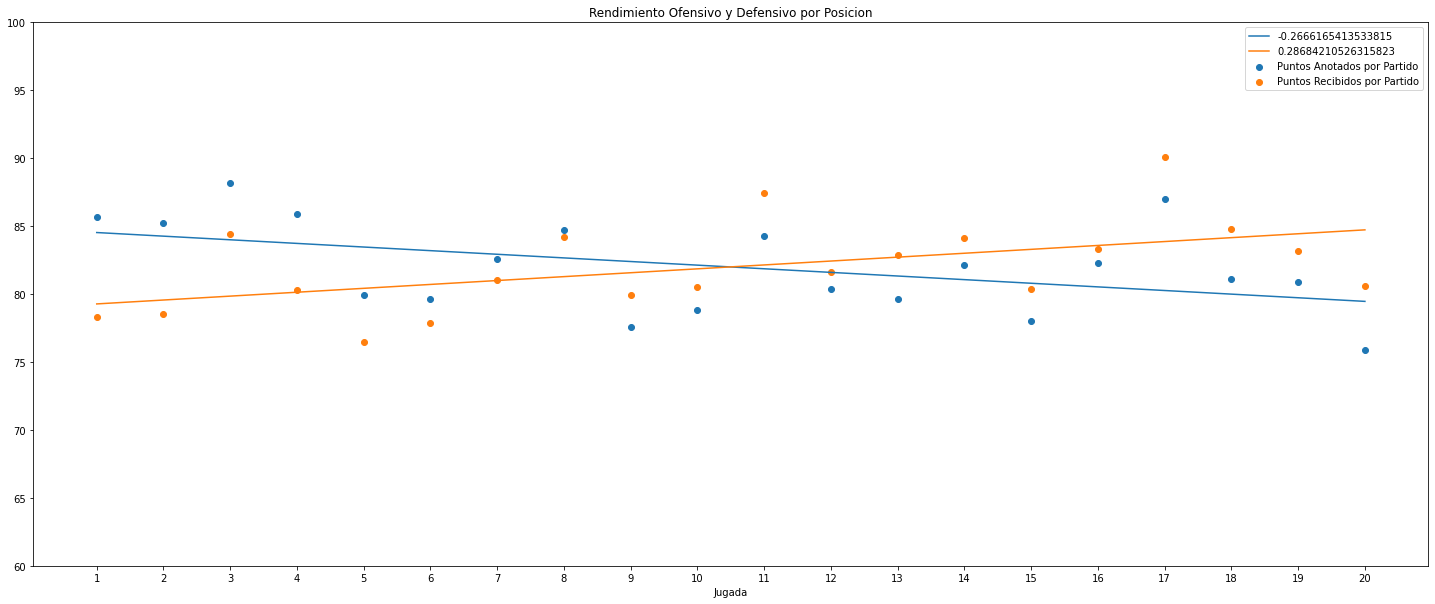

In [73]:
fig, ax = plt.subplots(figsize = (25, 10))

ax1 = ax.scatter(posiciones.sort_values(['#'])['#'], posiciones.sort_values(['#'])['Prom.1'], label = 'Puntos Anotados por Partido')
ax2 = ax.scatter(posiciones.sort_values(['#'])['#'], posiciones.sort_values(['#'])['Prom.2'], label = 'Puntos Recibidos por Partido')

plt.plot(x, m*x + b, label = str(m))
plt.plot(x, m2*x + b2, label = str(m2))
ax.set_ylim([60,100])
plt.xlabel("Jugada")
# plt.ylabel(equipos[0].play_values[stat])
plt.title('Rendimiento Ofensivo y Defensivo por Posicion')
plt.legend()
plt.xticks(x)
plt.show()

##### Cosas que pueden observarse en este grafico:
    - Hasta el puesto 8 (playoffs) la diferencia entre puntos anotados y recibidos es positiva.
    - La peor ofensiva de la temporada corresponde al peor equipo
    - La mejores ofensivas corresponden al equipo del puesto 3 (Atenas) y el del puesto 17 (Quilmes)
    - Las pendientes de ambas "tendencias" son similares

#### Resulta conveniente analizar la diferencia. Del grafico anterior parece haber una tendencia de la posicion 1 a 8 y otra de la 9 a la 20.

In [74]:
posiciones['Dif prom.'] = posiciones['Prom.1'] - posiciones['Prom.2']

In [75]:
y_dif = np.array(posiciones[posiciones['#'] <= 8]['Dif prom.'])
y_dif_2 = np.array(posiciones[posiciones['#'] >= 9]['Dif prom.'])
m3, b3 = np.polyfit(posiciones[posiciones['#'] <= 8]['#'], y_dif, 1)
m4, b4 = np.polyfit(posiciones[posiciones['#'] >= 9]['#'], y_dif_2, 1)

In [76]:
fig, ax = plt.subplots(figsize = (25, 10))

ax1 = ax.scatter(posiciones.sort_values(['#'])['#'], posiciones.sort_values(['#'])['Dif prom.'], label = 'Puntos Anotados por Partido')

plt.plot(np.array(posiciones[posiciones['#'] <= 8]['#']), m3*np.array(posiciones[posiciones['#'] <= 8]['#']) + b3)
plt.plot(np.array(posiciones[posiciones['#'] >= 9]['#']), m4*np.array(posiciones[posiciones['#'] >= 9]['#']) + b4)
# ax.set_ylim([60,100])
plt.xlabel("Jugada")
# plt.ylabel(equipos[0].play_values[stat])
plt.title('Dif entre el promedio de PA y PR por partido')
plt.legend()
plt.xticks(x)
plt.show()

#### De esta forma se pueden agrupar los equipos en 2 grupos: Top 8 (top_8) y el resto (worst_12). Igualmente se crea el grupo top_4 para analizar.


In [77]:
top_4 = posiciones[posiciones['#'] <= 4]
top_8 = posiciones[posiciones['#'] <= 8]
worst_12 = posiciones[posiciones['#'] >= 9]

In [80]:
## Chequear id de temporada

temp = 2 ## Season ID
print(equipos[1].temporadas[temp])

17_18


In [87]:
equipos[3].name

'La Union'

## Analisis Ofensivo

#### En primer lugar se pueden buscar tendencias generales entre las posiciones finales de los equipos y las estadisticas ofensivas. En estos primeros graficos no se analizara la dispersion entre los grupos.
#### Algo importante en este analisis es que hay que considerar que el grupo top_4 se encuentra incluido en el top_8.

In [88]:
## Chequear Stat a analizar

stat = 1 ## Stat ID
print(equipos[0].play_values[stat])

PPP


In [227]:
## Calculo del promedio de dicha stat para los 3 grupos generados antes

i = 0
top4_ppp = []
top8_ppp = []
worst12_ppp = []
while i < len(equipos):
    try:
        if equipos[i].name in (top_4['Equipo'].unique()):
            print('Equipo Top 4: '+equipos[i].name)
            vals=[equipos[i].play[j][temp][stat] for j in jug]
            top4_ppp.append(vals)
        elif equipos[i].name in (top_8['Equipo'].unique()):
            vals2=[equipos[i].play[j][temp][stat] for j in jug]
            print('Equipo Top 8: '+equipos[i].name)
            top8_ppp.append(vals2)
        elif equipos[i].name in (worst_12['Equipo'].unique()):
            vals3=[equipos[i].play[j][temp][stat] for j in jug]
            print('Equipo Worst 12: '+equipos[i].name)
            worst12_ppp.append(vals3)
        else:
            print('Equipo no agrupado: '+equipos[i].name)
    except:
        print('Equipo no presente en la temporada: '+equipos[i].name)
    i += 1
        
top_4_ppp_avgs = np.mean(np.array(top4_ppp), axis=0).tolist()
top_8_ppp_avgs = np.mean(np.array(top8_ppp), axis=0).tolist()
worst12_ppp_avgs = np.mean(np.array(worst12_ppp), axis=0).tolist()

Equipo no agrupado: Club Echague de Parana
Equipo Top 4: San Lorenzo de Almagro
Equipo Top 8: Gimnasia y Esgrima Comodoro Rivadavia
Equipo Top 8: La Union
Equipo Worst 12: Club Estudiantes Concordia
Equipo Worst 12: Club Ciclista Olimpico
Equipo no presente en la temporada: Salta Basket
Equipo Top 4: Instituto Atletico Central Cordoba
Equipo Top 4: Asociación Deportiva Atenas
Equipo Worst 12: Quilmes de Mar del Plata
Equipo Top 8: Obras Basket
Equipo no agrupado: Club Deportivo Libertad
Equipo Worst 12: Club de Regatas Corrientes
Equipo Top 4: Club San Martin
Equipo Worst 12: Hispano Americano Rio Gallegos
Equipo Worst 12: Boca Juniors
Equipo no presente en la temporada: Club Comunicaciones Corrientes
Equipo Top 8: Asociacion Atletica Quimsa
Equipo no agrupado: Club Atlético Lanús
Equipo no agrupado: Centro Juventud Sionista
Equipo Worst 12: Club Atletico Argentino
Equipo no agrupado: Club Atletico Platense Florida
Equipo Worst 12: Ferrocarril Oeste
Equipo Worst 12: Weber Bahia
Equipo 

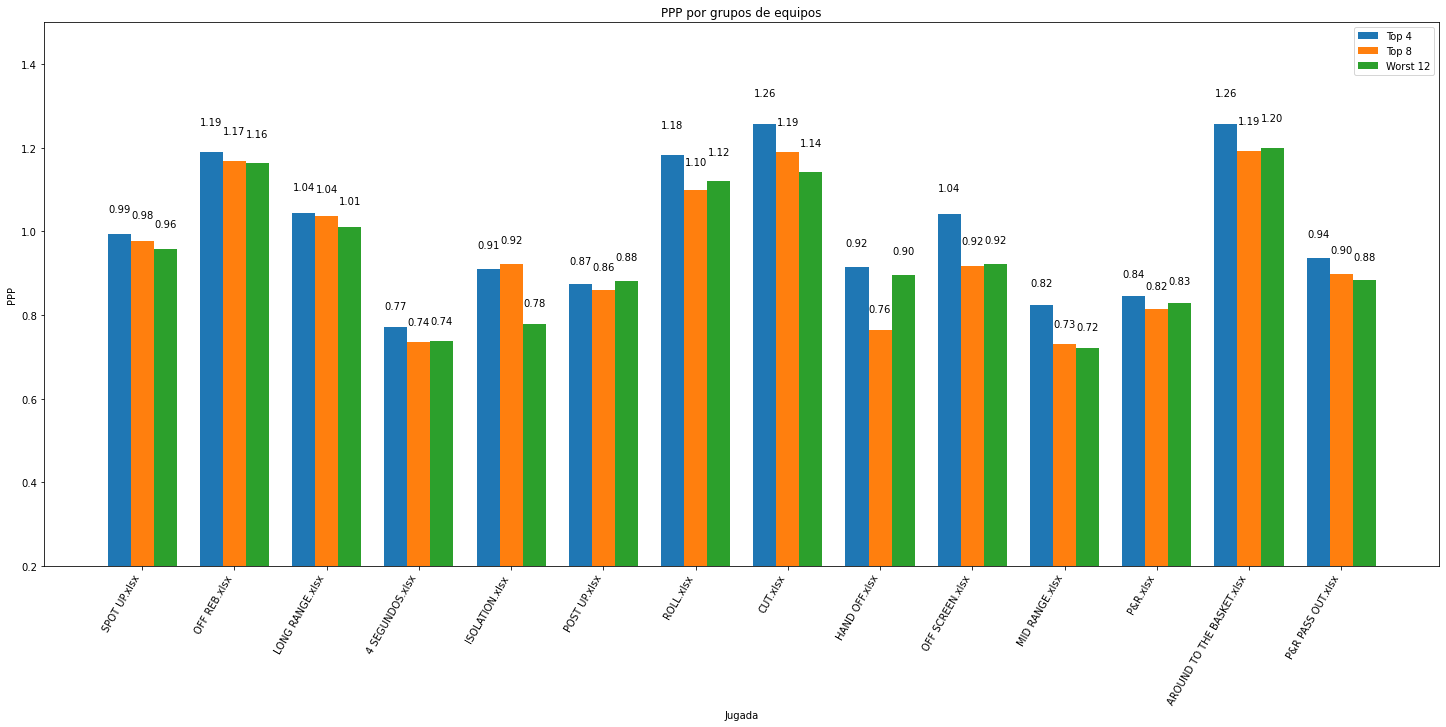

In [91]:
fig, ax = plt.subplots(figsize = (25, 10))

_X = np.arange(len(jug))

ax1 = ax.bar(_X-0.25, top_4_ppp_avgs, label = 'Top 4', width = 0.25)
ax2 = ax.bar(jug, top_8_ppp_avgs, label = 'Top 8', width = 0.25)
ax3 = ax.bar(_X+0.25, worst12_ppp_avgs, label = 'Worst 12', width = 0.25)

ax.set_ylim([0.2,1.5])
autolabel(ax1)
autolabel(ax2)
autolabel(ax3)
plt.xlabel("Jugada")
plt.ylabel(equipos[0].play_values[stat])
plt.title('PPP por grupos de equipos')
plt.legend()
plt.xticks(rotation=60, ha='right')
plt.show()

#### De este grafico se observan varias cosas:
    - A lo largo de la temporada las jugadas de Roll (de 2 puntos), las de poste bajo ("Around the basket"), "cut" y las de rebote ofensivo tienen una eficiencia similar a las de 3 pts.
    - Entre los distintos grupos, se observan diferencias importantes en "Cut", "4 segundos", "Isolation".
    - Los equipos mas eficientes de 3 puntos son los peores, por una minima diferencia.
    - Se observan diferencias importantes entre top_4 y top_8 en las categorias "Roll", "Hand Off", "Around the basket", "Cut"

#### Ahora, ¿Qué ocurre al analizar la distribución de posesiones a lo largo de un partido?

In [92]:
## Chequear Stat a analizar

stat = 3 ## Stat ID
print(equipos[0].play_values[stat])

Poss / Game


In [95]:
## Calculo del promedio de dicha stat para los 3 grupos generados antes

i = 0
top4_pos = []
top8_pos = []
worst12_pos = []
while i < len(equipos):
    try:
        if equipos[i].name in (top_4['Equipo'].unique()):
            print('Equipo Top 4: '+equipos[i].name)
            vals=[equipos[i].play[j][temp][stat] for j in jug]
            top4_pos.append(vals)
        elif equipos[i].name in (top_8['Equipo'].unique()):
            vals2=[equipos[i].play[j][temp][stat] for j in jug]
            print('Equipo Top 8: '+equipos[i].name)
            top8_pos.append(vals2)
        elif equipos[i].name in (worst_12['Equipo'].unique()):
            vals3=[equipos[i].play[j][temp][stat] for j in jug]
            print('Equipo Worst 12: '+equipos[i].name)
            worst12_pos.append(vals3)
        else:
            print('Equipo no agrupado: '+equipos[i].name)
    except:
        print('Equipo no presente en la temporada: '+equipos[i].name)
    i += 1
        
top_4_pos_avgs = np.mean(np.array(top4_pos), axis=0).tolist()
top_8_pos_avgs = np.mean(np.array(top8_pos), axis=0).tolist()
worst12_pos_avgs = np.mean(np.array(worst12_pos), axis=0).tolist()

Equipo no agrupado: Club Echague de Parana
Equipo Top 4: San Lorenzo de Almagro
Equipo Top 8: Gimnasia y Esgrima Comodoro Rivadavia
Equipo Top 8: La Union
Equipo Worst 12: Club Estudiantes Concordia
Equipo Worst 12: Club Ciclista Olimpico
Equipo no presente en la temporada: Salta Basket
Equipo Top 4: Instituto Atletico Central Cordoba
Equipo Top 4: Asociación Deportiva Atenas
Equipo Worst 12: Quilmes de Mar del Plata
Equipo Top 8: Obras Basket
Equipo no agrupado: Club Deportivo Libertad
Equipo Worst 12: Club de Regatas Corrientes
Equipo Top 4: Club San Martin
Equipo Worst 12: Hispano Americano Rio Gallegos
Equipo Worst 12: Boca Juniors
Equipo no presente en la temporada: Club Comunicaciones Corrientes
Equipo Top 8: Asociacion Atletica Quimsa
Equipo no agrupado: Club Atlético Lanús
Equipo no agrupado: Centro Juventud Sionista
Equipo Worst 12: Club Atletico Argentino
Equipo no agrupado: Club Atletico Platense Florida
Equipo Worst 12: Ferrocarril Oeste
Equipo Worst 12: Weber Bahia
Equipo 

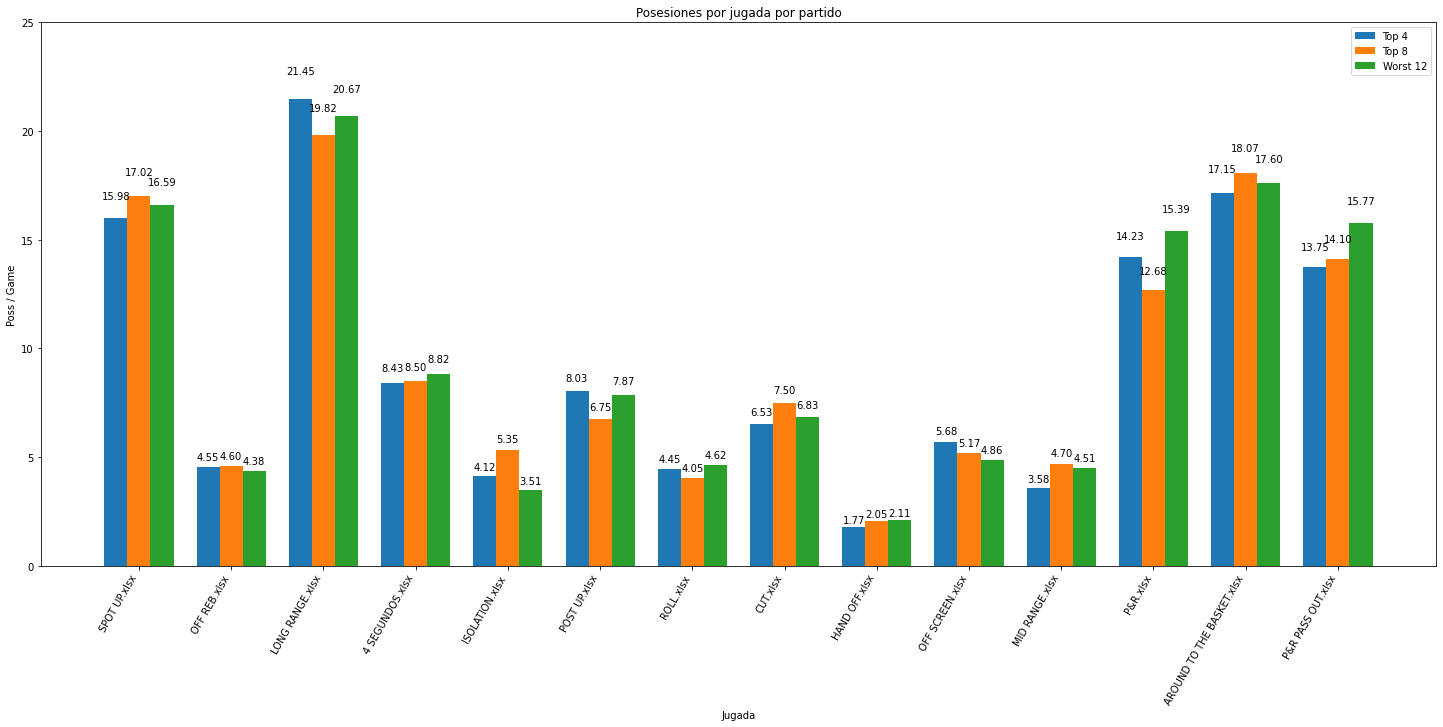

In [96]:
fig, ax = plt.subplots(figsize = (25, 10))

_X = np.arange(len(jug))

ax1 = ax.bar(_X-0.25, top_4_pos_avgs, label = 'Top 4', width = 0.25)
ax2 = ax.bar(jug, top_8_pos_avgs, label = 'Top 8', width = 0.25)
ax3 = ax.bar(_X+0.25, worst12_pos_avgs, label = 'Worst 12', width = 0.25)

ax.set_ylim([0,25])
autolabel(ax1)
autolabel(ax2)
autolabel(ax3)
plt.xlabel("Jugada")
plt.ylabel(equipos[0].play_values[stat])
plt.title('Posesiones por jugada por partido')
plt.legend()
plt.xticks(rotation=60, ha='right')
plt.show()

    - Se observan 5 grandes grupos de jugadas: "spot up", "long range", "p&r", "around the basket" y "p&r pass out"
    - Hay variacion en la distribucion de posesiones en esas 5 jugadas.
    - Se observa que los peores equipos definen menos jugadas debajo del aro (Cut, Off Reb, Around the basket), a pesar de que en el grafico anterior tenian una eficiencia general. La unica excepcion parece ser "Roll".
    - Entre top_4 y top_8 se observan diferencias significativas (mas de una posesion) en varias categorias, denotando un perfil de distribucion de jugadas distinto.

#### Otro analisis complementario esta en ver los puntos por partido por tipo de jugada

In [97]:
## Chequear Stat a analizar

stat = 4 ## Stat ID
print(equipos[0].play_values[stat])

Points


In [100]:
## Calculo del promedio de dicha stat para los 3 grupos generados antes

i = 0
top4_points = []
top8_points = []
worst12_points = []
while i < len(equipos):
    try:
        if equipos[i].name in (top_4['Equipo'].unique()):
            print('Equipo Top 4: '+equipos[i].name)
            vals=[equipos[i].play[j][temp][stat] for j in jug]
            top4_points.append(vals)
        elif equipos[i].name in (top_8['Equipo'].unique()):
            vals2=[equipos[i].play[j][temp][stat] for j in jug]
            print('Equipo Top 8: '+equipos[i].name)
            top8_points.append(vals2)
        elif equipos[i].name in (worst_12['Equipo'].unique()):
            vals3=[equipos[i].play[j][temp][stat] for j in jug]
            print('Equipo Worst 4: '+equipos[i].name)
            worst12_points.append(vals3)
        else:
            print('Equipo no agrupado: '+equipos[i].name)
    except:
        print('Equipo no presente en la temporada: '+equipos[i].name)
    i += 1
        
top_4_points_avgs = np.mean(np.array(top4_points), axis=0).tolist()
top_8_points_avgs = np.mean(np.array(top8_points), axis=0).tolist()
worst12_points_avgs = np.mean(np.array(worst12_points), axis=0).tolist()

Equipo no agrupado: Club Echague de Parana
Equipo Top 4: San Lorenzo de Almagro
Equipo Top 8: Gimnasia y Esgrima Comodoro Rivadavia
Equipo Top 8: La Union
Equipo Worst 4: Club Estudiantes Concordia
Equipo Worst 4: Club Ciclista Olimpico
Equipo no presente en la temporada: Salta Basket
Equipo Top 4: Instituto Atletico Central Cordoba
Equipo Top 4: Asociación Deportiva Atenas
Equipo Worst 4: Quilmes de Mar del Plata
Equipo Top 8: Obras Basket
Equipo no agrupado: Club Deportivo Libertad
Equipo Worst 4: Club de Regatas Corrientes
Equipo Top 4: Club San Martin
Equipo Worst 4: Hispano Americano Rio Gallegos
Equipo Worst 4: Boca Juniors
Equipo no presente en la temporada: Club Comunicaciones Corrientes
Equipo Top 8: Asociacion Atletica Quimsa
Equipo no agrupado: Club Atlético Lanús
Equipo no agrupado: Centro Juventud Sionista
Equipo Worst 4: Club Atletico Argentino
Equipo no agrupado: Club Atletico Platense Florida
Equipo Worst 4: Ferrocarril Oeste
Equipo Worst 4: Weber Bahia
Equipo Worst 4: 

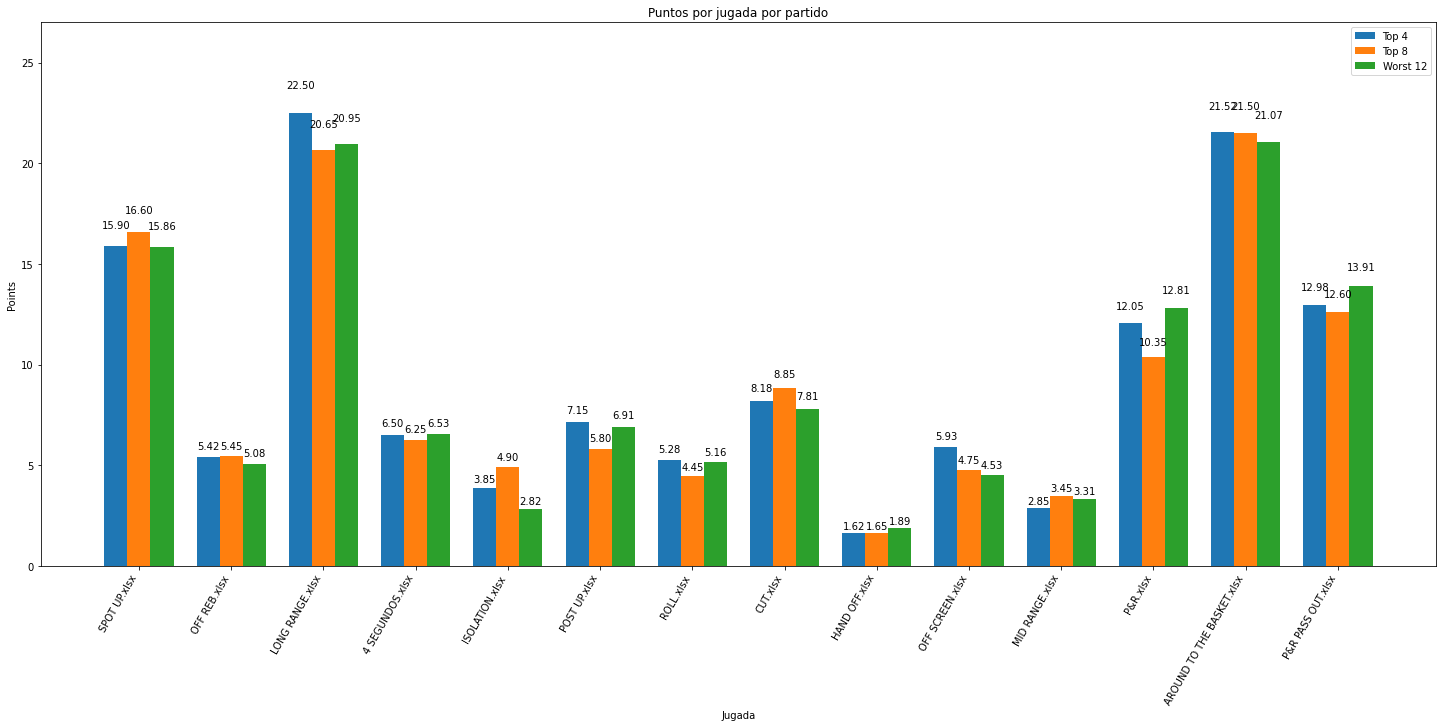

In [101]:
fig, ax = plt.subplots(figsize = (25, 10))

_X = np.arange(len(jug))

ax1 = ax.bar(_X-0.25, top_4_points_avgs, label = 'Top 4', width = 0.25)
ax2 = ax.bar(jug, top_8_points_avgs, label = 'Top 8', width = 0.25)
ax3 = ax.bar(_X+0.25, worst12_points_avgs, label = 'Worst 12', width = 0.25)

ax.set_ylim([0,27])
autolabel(ax1)
autolabel(ax2)
autolabel(ax3)
plt.xlabel("Jugada")
plt.ylabel(equipos[0].play_values[stat])
plt.title('Puntos por jugada por partido')
plt.legend()
plt.xticks(rotation=60, ha='right')
plt.show()

Quilmes de Mar del Plata


[17.1, 4.9, 28.6, 3.7, 1.7, 7.5, 6.2, 6.4, 2.9, 8.7, 2.8, 15.9, 20.5, 15.2]

#### Un problema que tienen los graficos anteriores es que no se analiza la distribucion de la metrica en cada jugada. Usando boxplots se puede conocer un poco mejor dicha poblacion

##### En el caso de querer analizar algun equipo en particular se puede seleccionar abajo:

In [205]:
eq = 9
stat = 1
print(equipos[eq].name + ' ' + equipos[eq].play_values[stat])
vals_eq = [equipos[eq].play[j][temp][stat] for j in jug]

Quilmes de Mar del Plata PPP


#### A modo de ejemplo se plotea PPP

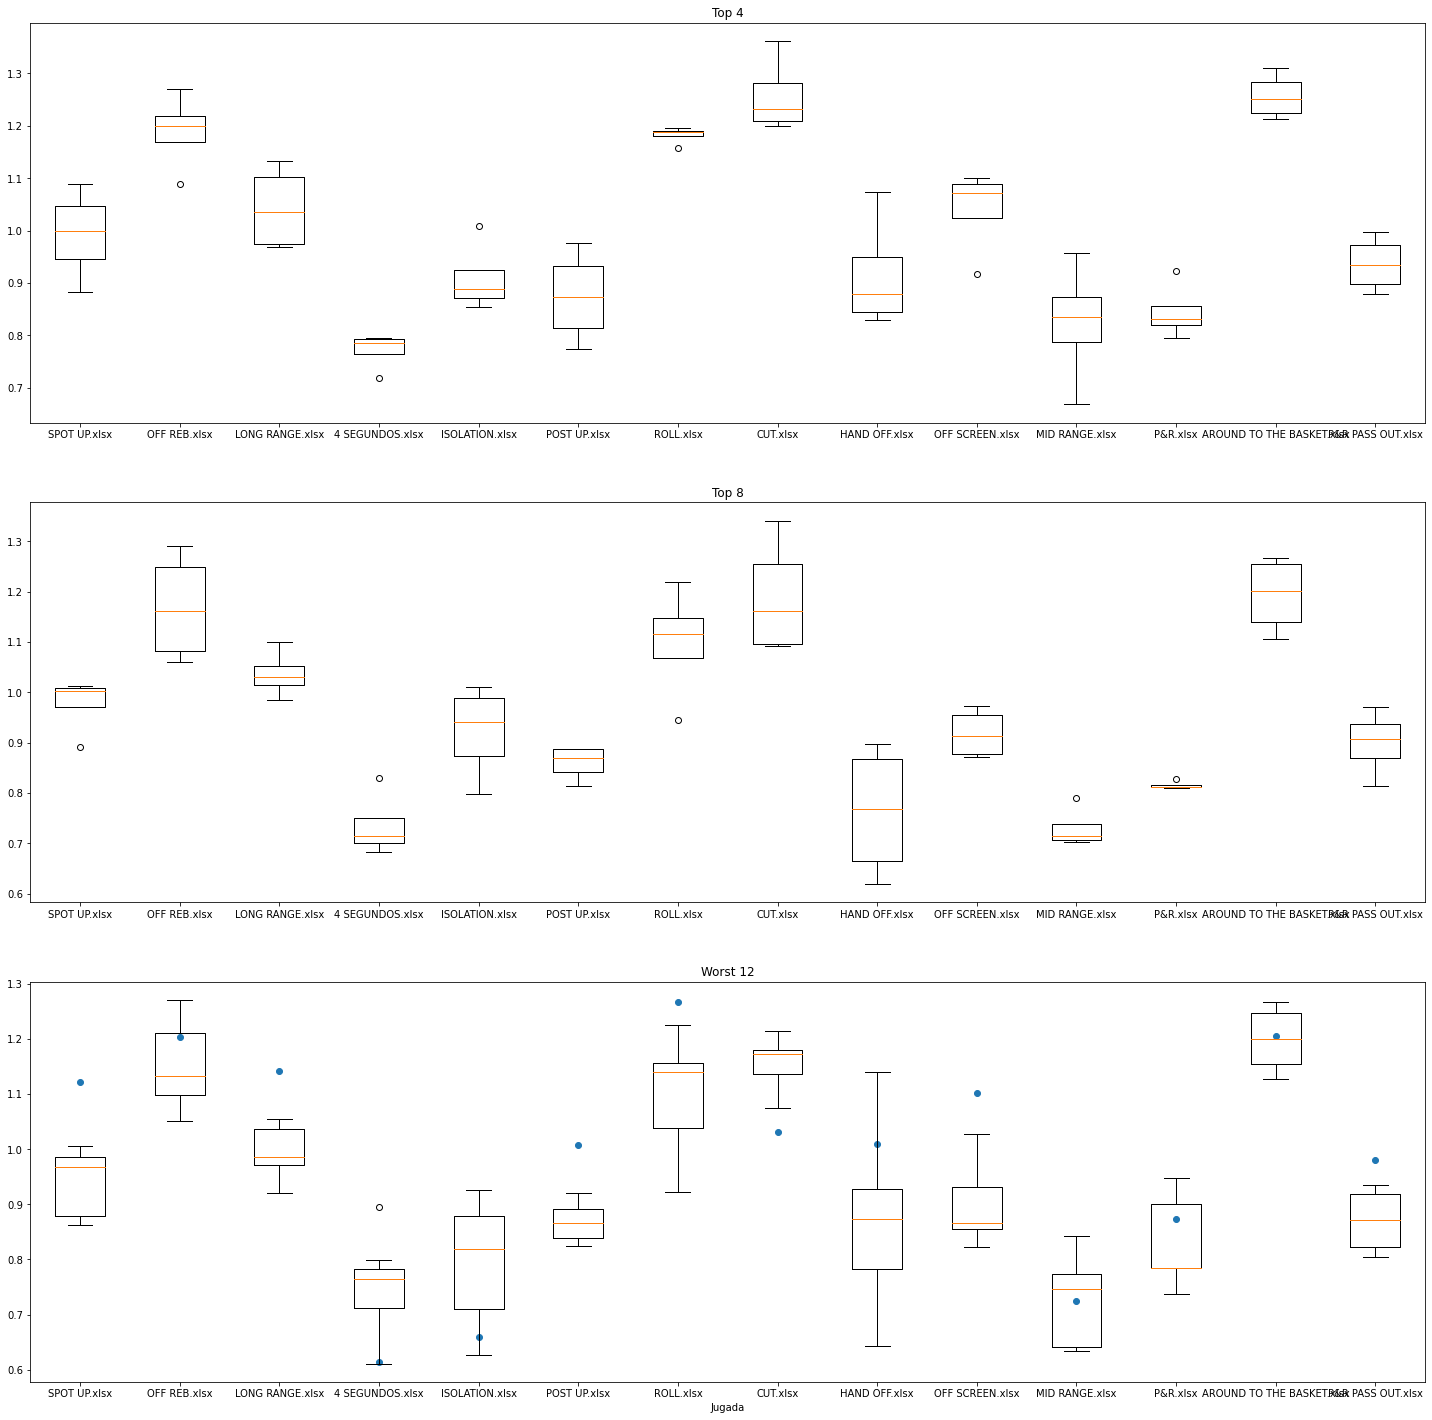

In [232]:
columns = 1
rows = 3
fig, axes = plt.subplots(rows, columns, squeeze=False,figsize = (25, 25))

_X = np.arange(len(jug))

axes[0,0].boxplot(np.array(top4_ppp))
axes[0,0].set_title('Top 4')
axes[1,0].boxplot(np.array(top8_ppp))
axes[1,0].set_title('Top 8')
axes[2,0].boxplot(np.array(worst12_ppp))
axes[2,0].set_title('Worst 12')
axes[2,0].scatter(_X+1, vals_eq)
plt.xlabel("Jugada")
plt.setp(axes, xticklabels=jug)
# plt.ylabel(equipos[0].play_values[stat])
# plt.title('Puntos por jugada por partido')
# plt.legend()
# plt.xticks(rotation=60, ha='right')
plt.show()

#### De los graficos anteriores se puede observar que hay mucha variacion en cada una de las variables para los 3 grupos, sobre todo en el caso de "Worst 12", que era esperable producto de que incluye mas del 50% de los equipos de la competencia.

     - El caso de Quilmes esta temporada es muy particular, siendo un outlier en 9 de 14 jugadas
     - Esto tambien muestra que el grafico de barras utilizando el promedio es engañoso.
     
#### ¿Qué ocurre si sacamos a Quilmes de worst_12 y ploteamos PPP como antes?

In [220]:
print(equipos[eq].name)

Quilmes de Mar del Plata


In [229]:
## Calculo del promedio de dicha stat para los 3 grupos generados antes
print(equipos[eq].name)
i = 0
top4_ppp = []
top8_ppp = []
worst12_ppp = []
while i < len(equipos):
    try:
        if  equipos[eq].name == equipos[i].name:
            print('Equipo excluido: '+equipos[eq].name)
        elif equipos[i].name in (top_4['Equipo'].unique()):
            print('Equipo Top 4: '+equipos[i].name)
            vals=[equipos[i].play[j][temp][stat] for j in jug]
            top4_ppp.append(vals)
        elif equipos[i].name in (top_8['Equipo'].unique()):
            vals2=[equipos[i].play[j][temp][stat] for j in jug]
            print('Equipo Top 8: '+equipos[i].name)
            top8_ppp.append(vals2)
        elif equipos[i].name in (worst_12['Equipo'].unique()):
            vals3=[equipos[i].play[j][temp][stat] for j in jug]
            print('Equipo Worst 12: '+equipos[i].name)
            worst12_ppp.append(vals3)
        else:
            print('Equipo no agrupado: '+equipos[i].name)
    except:
        print('Equipo no presente en la temporada: '+equipos[i].name)
    i += 1
        
top_4_ppp_avgs = np.mean(np.array(top4_ppp), axis=0).tolist()
top_8_ppp_avgs = np.mean(np.array(top8_ppp), axis=0).tolist()
worst12_ppp_avgs2 = np.mean(np.array(worst12_ppp), axis=0).tolist()

Quilmes de Mar del Plata
Equipo no agrupado: Club Echague de Parana
Equipo Top 4: San Lorenzo de Almagro
Equipo Top 8: Gimnasia y Esgrima Comodoro Rivadavia
Equipo Top 8: La Union
Equipo Worst 12: Club Estudiantes Concordia
Equipo Worst 12: Club Ciclista Olimpico
Equipo no presente en la temporada: Salta Basket
Equipo Top 4: Instituto Atletico Central Cordoba
Equipo Top 4: Asociación Deportiva Atenas
Equipo excluido: Quilmes de Mar del Plata
Equipo Top 8: Obras Basket
Equipo no agrupado: Club Deportivo Libertad
Equipo Worst 12: Club de Regatas Corrientes
Equipo Top 4: Club San Martin
Equipo Worst 12: Hispano Americano Rio Gallegos
Equipo Worst 12: Boca Juniors
Equipo no presente en la temporada: Club Comunicaciones Corrientes
Equipo Top 8: Asociacion Atletica Quimsa
Equipo no agrupado: Club Atlético Lanús
Equipo no agrupado: Centro Juventud Sionista
Equipo Worst 12: Club Atletico Argentino
Equipo no agrupado: Club Atletico Platense Florida
Equipo Worst 12: Ferrocarril Oeste
Equipo Wors

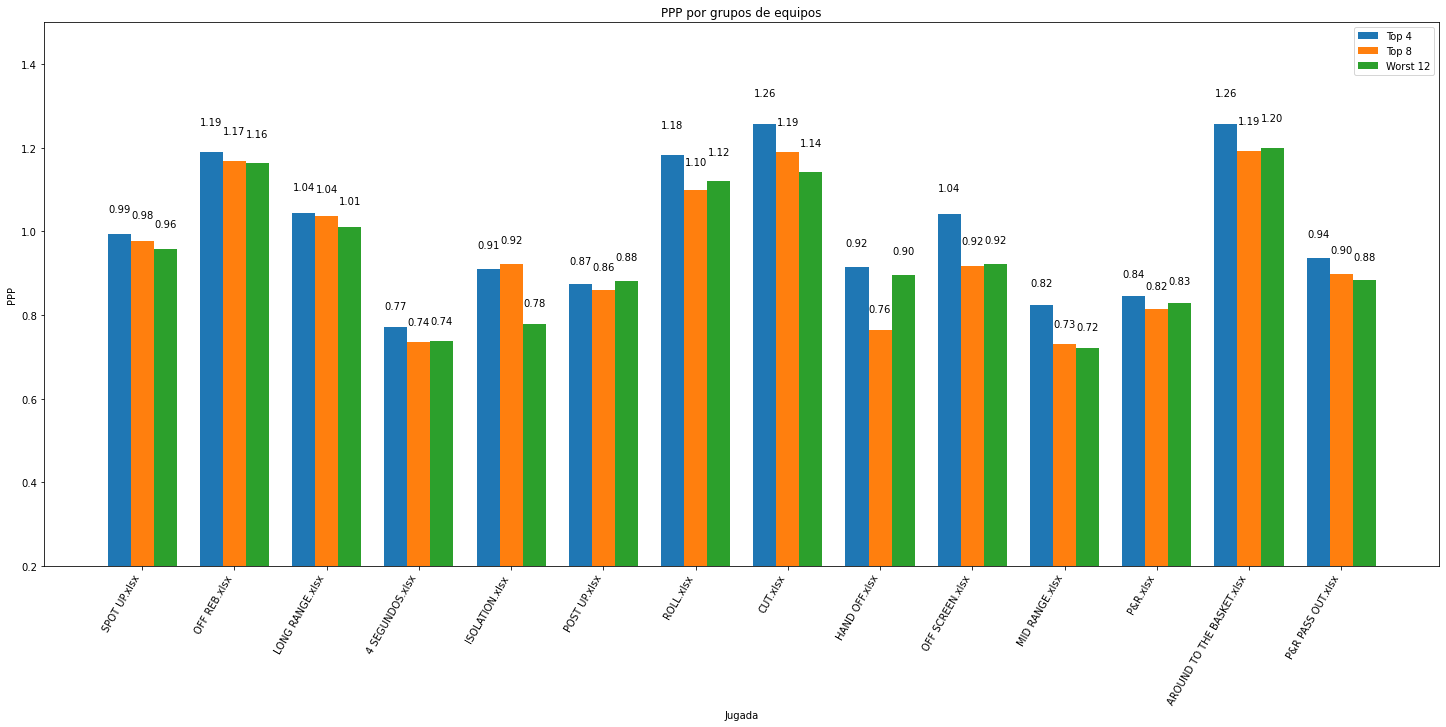

In [231]:
fig, ax = plt.subplots(figsize = (25, 10))

_X = np.arange(len(jug))

ax1 = ax.bar(_X-0.25, top_4_ppp_avgs, label = 'Top 4', width = 0.25)
ax2 = ax.bar(jug, top_8_ppp_avgs, label = 'Top 8', width = 0.25)
ax3 = ax.bar(_X+0.25, worst12_ppp_avgs, label = 'Worst 12', width = 0.25)

ax.set_ylim([0.2,1.5])
autolabel(ax1)
autolabel(ax2)
autolabel(ax3)
plt.xlabel("Jugada")
plt.ylabel(equipos[0].play_values[stat])
plt.title('PPP por grupos de equipos')
plt.legend()
plt.xticks(rotation=60, ha='right')
plt.show()